## Import

In [1]:
import numpy as np
np.random.seed(2024)
from scipy import stats
import matplotlib.pyplot as plt

## Read data

In [2]:
# 정규성 검정의 예제 데이터를 생성한다.
norm = np.random.normal(scale=3, size=25)
non_norm = np.random.exponential(scale=1.5, size=10000)

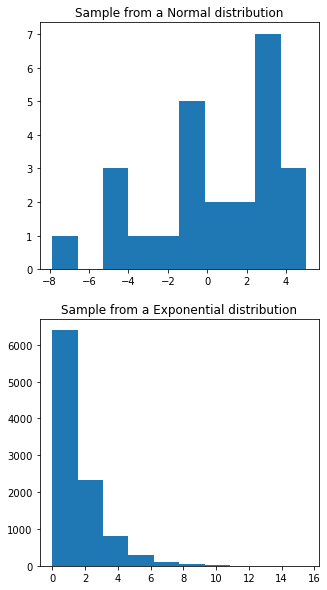

In [3]:
# 정규분포에서 추출되었으나 치우친 norm, 정규분포가 아닌 지수분포에서 추출한 non_norm의 분포를 확인한다.
fig, ax = plt.subplots(2, 1, figsize=(5,10))
ax[0].hist(norm)
ax[0].set_title("Sample from a Normal distribution")
ax[1].hist(non_norm)
ax[1].set_title("Sample from a Exponential distribution")
plt.show()

## 정규성 검정
$$H_0: \text{데이터는 정규분포를 따른다.}$$
$$H_1: \text{데이터는 정규분포를 따르지 않는다.}$$
- $p-value$가 $\alpha$보다 커야 유의수준 하에서 `귀무가설`(정규성)을 만족한다고 판단한다.
- T-test, ANOVA, LinearRegression, CorrelationAnalysis, Chi-square test의 가정 검정이다.
- 표본 크기가 30 이상이면 중심극한정리에 근거하여 정규성을 만족한다고 판단한다.
- 정규성을 정확히 확인하기 위해선 Shapiro-Wilk Test, Kolmogorov-Smirnov Test를 해보거나 Q-Q plot을 그려보기도 한다.

#### Shapiro-Wilk Test
- 가장 일반적인 정규성 검정으로 데이터 크기가 작을 때 사용하기 좋다.

In [4]:
# histogram에선 정규성을 확인할 수 없었으나 정규분포에서 추출되어 정규성을 띔을 판별한다.
alpha = 0.05
_, p_value = stats.shapiro(norm)

print(f'norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if p_value > alpha else '정규성을 만족하지 않습니다.')

norm: 유의수준 0.05하에 정규성을 만족합니다.


In [5]:
# 데이터 크기가 5000개 초과일 경우 정확하지 않다며 5000개 미만일 경우에만 사용을 권장한다.
alpha = 0.05
_, p_value = stats.shapiro(non_norm)

print(f'non_norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if p_value > alpha else '정규성을 만족하지 않습니다.')

non_norm: 유의수준 0.05하에 정규성을 만족하지 않습니다.


C:\Users\ha\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Kolmogorov-Smirnov Test
- 두 확률 분포의 차이를 검정하는 비모수적인 방법 중 하나이다.
- Shapiro검정처럼 자주 사용되는 정규성 검정으로 큰 데이터셋(5000개 이상)에 적합하다.

In [6]:
# 크기가 작은 데이터에선 정규성 판단이 어렵다.
_, p_value = stats.kstest(norm, 'norm')

print(f'norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if p_value > alpha else '정규성을 만족하지 않습니다.')

norm: 유의수준 0.05하에 정규성을 만족하지 않습니다.


In [7]:
_, p_value = stats.kstest(non_norm, 'norm')

print(f'non_norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if p_value > alpha else '정규성을 만족하지 않습니다.')

non_norm: 유의수준 0.05하에 정규성을 만족하지 않습니다.


#### Anderson-Darling Test
- 큰 데이터셋에 대해 Shapiro-Wilk 검정보다 정확한 정규성 검정이 필요할 때 사용한다.
- Kolmogorov-Smirnov에서 확장된 검정이다.

In [8]:
# Kolmogorov-Smirnov에서 확장된 검정으로 직접 검정통계량과 임계값을 비교해야 한다.
result = stats.anderson(non_norm) 
print('검정통계량:', result.statistic)
print('유의수준 하의 임계값:', dict(zip(result.significance_level/100, result.critical_values)))

검정통계량: 457.6674670687971
유의수준 하의 임계값: {0.15: 0.576, 0.1: 0.656, 0.05: 0.787, 0.025: 0.918, 0.01: 1.092}


In [9]:
# 유의수준을 0.05로 통일함에 result.critical_values[2]과 검정통계량을 비교한다.
print(f'non_norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if result.statistic < result.critical_values[2] else '정규성을 만족하지 않습니다.')

non_norm: 유의수준 0.05하에 정규성을 만족하지 않습니다.


#### Kurtosis Test
- 첨도(뾰족한 정도, 3)를 기준으로 정규 분포와 얼마나 일치하는지를 평가한다.

In [10]:
# 데이터가 작은 경우에도 유용하다.
_, p_value = stats.kurtosistest(norm)
print(f'norm: 유의수준 {alpha}하에', '정규성을 만족합니다.' if p_value > alpha else '정규성을 만족하지 않습니다.')

norm: 유의수준 0.05하에 정규성을 만족합니다.


#### D’Agostino-Pearson Test & Jarque-Bera Test
- 데이터의 왜도(비대칭성)와 첨도를 사용하여 정규성을 확인하는 검정 방법이다.
- Jarque-Bera Test보단 D’Agostino-Pearson Test이 더 널리 사용된다.

In [11]:
# 두 기법 모두 데이터가 작은 경우에도 유용하다.
_, DAP_p_value = stats.normaltest(norm)
_, JB_p_value = stats.jarque_bera(norm)
print('두 기법 모두 정규성을 만족한다고 판단합니다.' if DAP_p_value > alpha and JB_p_value > alpha else '어느 한 기법은 정규성을 만족하지 않는다고 판단합니다.')

두 기법 모두 정규성을 만족한다고 판단합니다.


#### Q-Q plot
- Histogram보다 정확하게 정규성, 이상치를 확인할 때 사용한다.
- 대각선을 따라 일직선 상에 위치하면 정규분포를 따른다고 판단하고<br>
  대각선에서 벗어나거나 휘어지는 형태이면 정규분포를 따르지 않는다고 어느 한쪽으로 치우친 형태라고 판단한다.

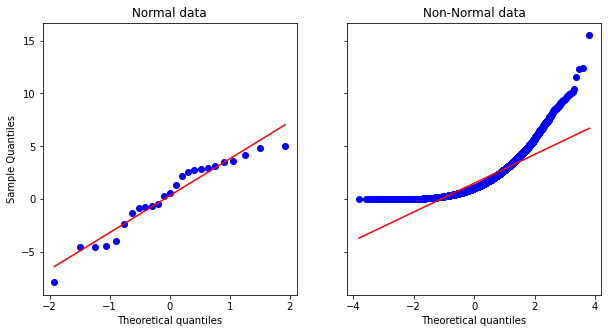

In [12]:
# 시각적으론 정규성을 정확히 판단하기 어렵다. 분석가마다 주관의 차이도 존재한다.
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
stats.probplot(norm, dist='norm', plot=ax[0])
stats.probplot(non_norm, dist='norm', plot=ax[1])
ax[0].set_title("Normal data")
ax[1].set_title("Non-Normal data")
ax[0].set_ylabel('Sample Quantiles')
ax[1].set_ylabel('')
plt.show()